In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from tslearn.barycenters import euclidean_barycenter, dtw_barycenter_averaging, softdtw_barycenter
from tslearn.datasets import CachedDatasets

%matplotlib inline

In [3]:
def get_class_x(train_file_name):
    train_data = open('../data/' + train_file_name, 'r')
    train_x = list()
    train_label = list()
    
    # Read data
    for i, line in enumerate(train_data): 
        array = line.split()
        train_label.append(int(float(array[0])))
        train_x.append(np.array(array[1:]).astype(float))

    train_label = np.array(train_label).reshape((len(train_label)))
    train_x = np.array(train_x).reshape((len(train_x), train_x[0].shape[0]))

    # Collect data in class
    classes = np.unique(train_label)
    class_x = [list() for i in classes]
    for i in range(train_label.shape[0]):
        class_x[train_label[i]-1].append(np.array(train_x[i]))
    class_x = np.array(class_x)
    return class_x

In [17]:
class_x = get_class_x('50words_TRAIN')
class_avg = [list() for i in range(len(class_x))]
for c in range(len(class_x)):
    class_avg[c] = softdtw_barycenter(class_x[c], gamma=1., max_iter=100)
class_avg = np.array(class_avg)

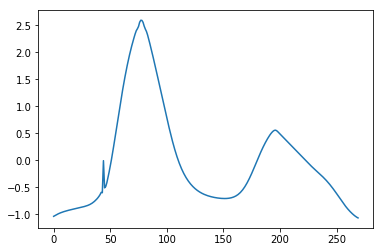

In [19]:
plt.plot(class_avg[1])